In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import random
import os 
from tqdm import tqdm
import cv2 as cv   
from sklearn.model_selection import train_test_split 


In [2]:
folder_path = "leapGestRecog"

In [3]:
folder_name = [] 

for i in range(10): 
    folder_name.append(f"{folder_path}/0{i}")
folder_name

['leapGestRecog/00',
 'leapGestRecog/01',
 'leapGestRecog/02',
 'leapGestRecog/03',
 'leapGestRecog/04',
 'leapGestRecog/05',
 'leapGestRecog/06',
 'leapGestRecog/07',
 'leapGestRecog/08',
 'leapGestRecog/09']

In [4]:
os.listdir(folder_name[0])

['01_palm',
 '02_l',
 '03_fist',
 '04_fist_moved',
 '05_thumb',
 '06_index',
 '07_ok',
 '08_palm_moved',
 '09_c',
 '10_down']

In [5]:
file_names = os.listdir(folder_name[0])

In [6]:
random.choices(file_names , k =3)

['08_palm_moved', '10_down', '03_fist']

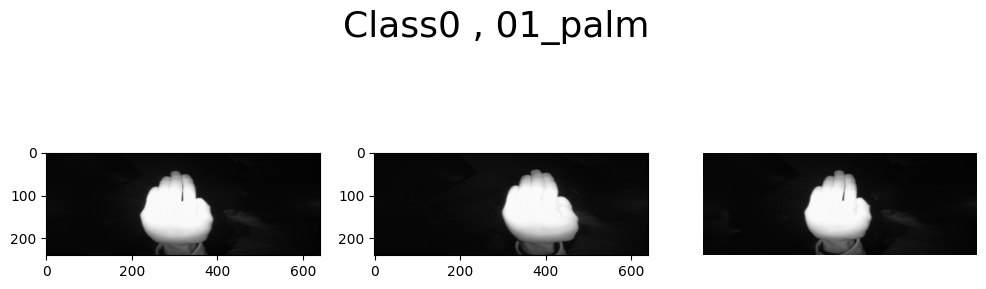

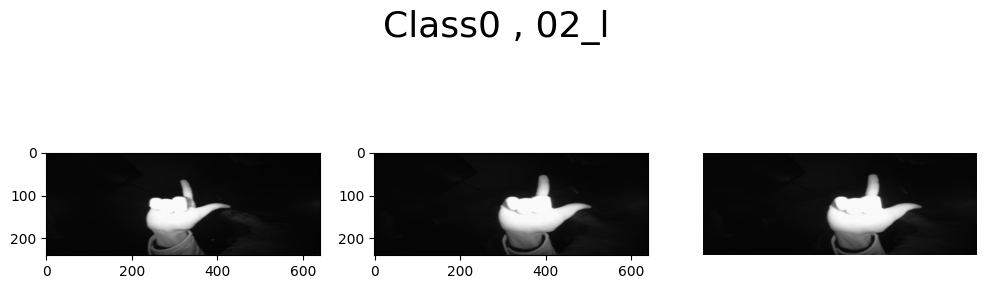

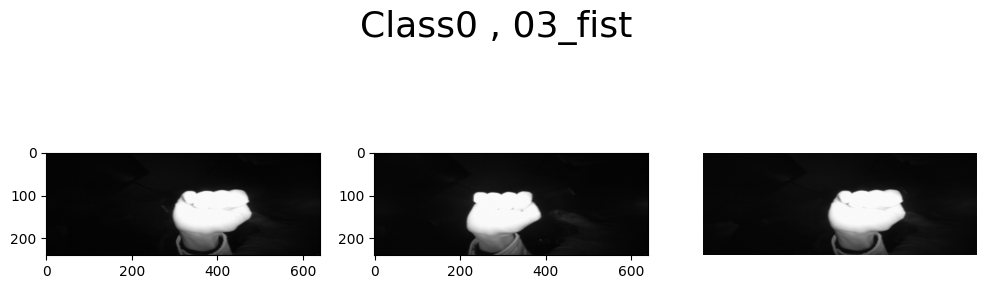

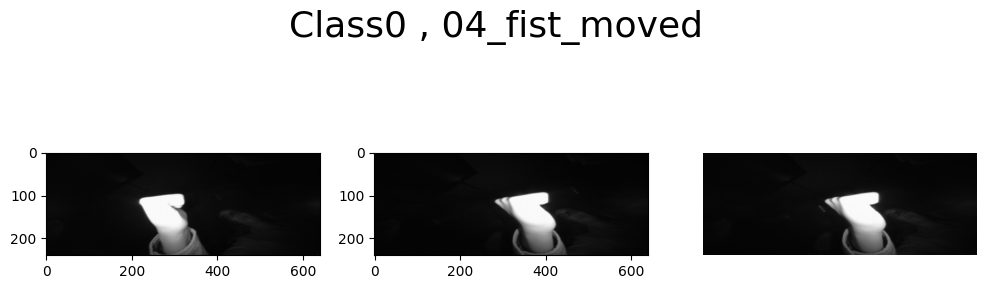

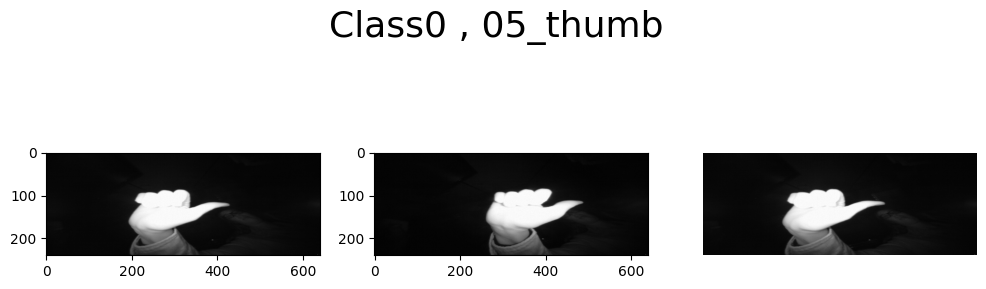

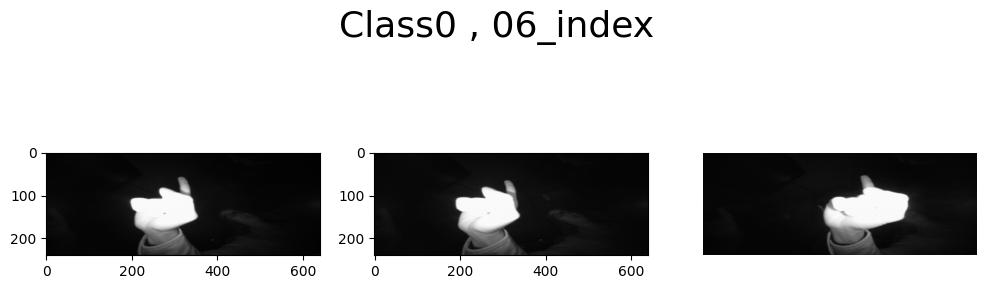

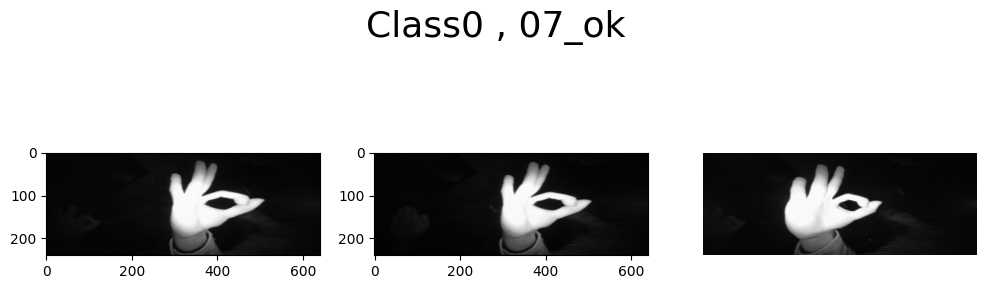

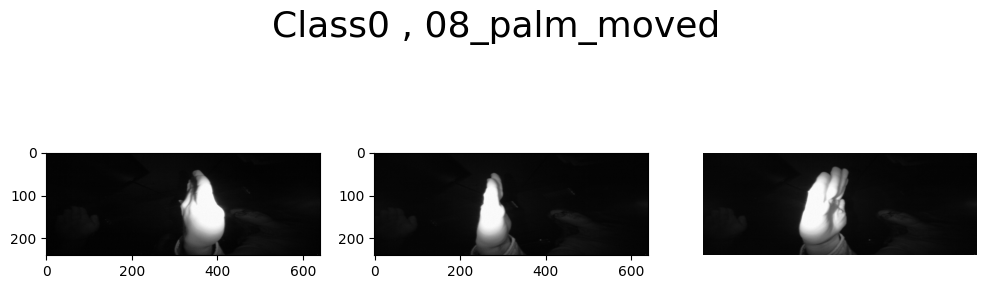

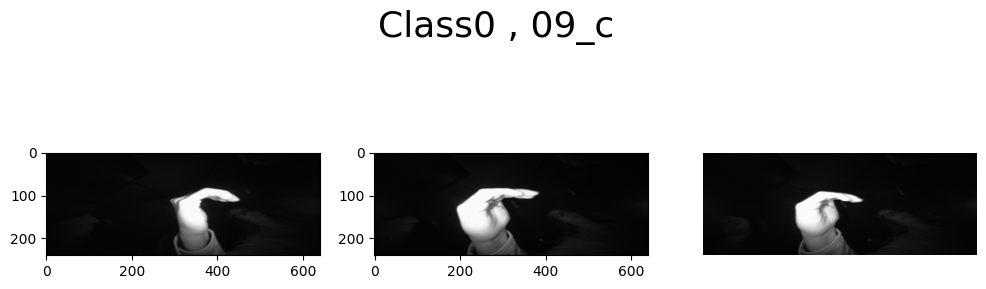

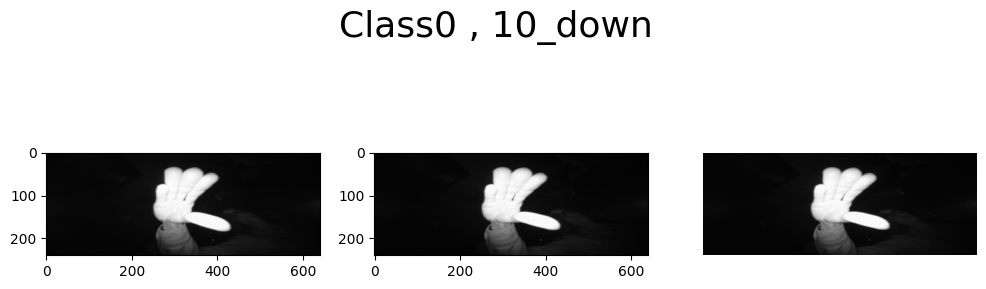

In [7]:

for folder in folder_name[:1]: 
    class_name = folder[-1] 
    for file in file_names: 
        path = os.path.join(folder , file) 
        x = 0 

        fig ,ax = plt.subplots(1 ,3 , figsize=(12,4)) 
        random_imges =random.choices( os.listdir(path) , k=3)
        for img in random_imges:
            img_arr = cv.imread(os.path.join(path , img) , cv.IMREAD_GRAYSCALE) 
            ax[x].imshow(img_arr , cmap='gray')
            x+=1
            if x==3:
                break 

        plt.suptitle(f"Class{class_name} , {file}", fontsize=26)
        plt.axis(False)
        plt.show()
        

### ðŸ”ƒðŸŽˆLoading the data 

In [8]:
training_data = [] 
for folder in folder_name: 
    class_num = folder[-1]
    for file in file_names:
        path = os.path.join(folder  , file) 
        print("class " , class_num , file) 

        for img in tqdm(os.listdir(path)): 

            img_array = cv.imread(os.path.join(path , img) , cv.IMREAD_GRAYSCALE) 

            training_data.append([img_array , int(class_num) ])

        

class  0 01_palm


100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 200/200 [00:00<00:00, 414.19it/s]


class  0 02_l


100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 200/200 [00:00<00:00, 437.79it/s]


class  0 03_fist


100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 200/200 [00:00<00:00, 429.20it/s]


class  0 04_fist_moved


100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 200/200 [00:00<00:00, 452.61it/s]


class  0 05_thumb


100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 200/200 [00:00<00:00, 417.23it/s]


class  0 06_index


100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 200/200 [00:00<00:00, 416.70it/s]


class  0 07_ok


100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 200/200 [00:00<00:00, 389.90it/s]


class  0 08_palm_moved


100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 200/200 [00:00<00:00, 416.85it/s]


class  0 09_c


100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 200/200 [00:00<00:00, 416.33it/s]


class  0 10_down


100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 200/200 [00:00<00:00, 405.07it/s]


class  1 01_palm


100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 200/200 [00:00<00:00, 426.41it/s]


class  1 02_l


100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 200/200 [00:00<00:00, 435.63it/s]


class  1 03_fist


100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 200/200 [00:00<00:00, 408.57it/s]


class  1 04_fist_moved


100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 200/200 [00:00<00:00, 417.61it/s]


class  1 05_thumb


100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 200/200 [00:00<00:00, 435.36it/s]


class  1 06_index


100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 200/200 [00:00<00:00, 301.55it/s]


class  1 07_ok


100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 200/200 [00:00<00:00, 454.71it/s]


class  1 08_palm_moved


100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 200/200 [00:00<00:00, 403.11it/s]


class  1 09_c


100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 200/200 [00:00<00:00, 414.39it/s]


class  1 10_down


100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 200/200 [00:00<00:00, 447.34it/s]


class  2 01_palm


100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 200/200 [00:00<00:00, 432.82it/s]


class  2 02_l


100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 200/200 [00:00<00:00, 433.43it/s]


class  2 03_fist


100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 200/200 [00:00<00:00, 410.47it/s]


class  2 04_fist_moved


100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 200/200 [00:00<00:00, 402.26it/s]


class  2 05_thumb


100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 200/200 [00:00<00:00, 411.51it/s]


class  2 06_index


100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 200/200 [00:00<00:00, 380.97it/s]


class  2 07_ok


100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 200/200 [00:00<00:00, 314.95it/s]


class  2 08_palm_moved


100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 200/200 [00:00<00:00, 367.56it/s]


class  2 09_c


 54%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–Ž    | 107/200 [00:00<00:00, 315.98it/s]

: 

In [ ]:
for folder in folder_name: 
    class_num = folder[-1]
    for file in file_names:
        path = os.path.join(folder  , file) 
        print("class " , class_num)
        for img in os.listdir(path): 
            img_arr = cv.imread(os.path.join(path , img) , cv.IMREAD_GRAYSCALE )
            print("Image shape " , img_arr.shape  , " \n")
            break 

        break